In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib as mpl 

## agg backend is used to create plot as a .png file
mpl.use('agg')

In [30]:
def make_selecting_plot(plot_data, filename):
    fig = plt.figure()
    fig.set_figheight(5)
    fig.set_figwidth(12)
    st = fig.suptitle(filename[14:-4], fontsize="x-large")
    j = 0;
    for dataitem in plot_data:
        y_pos = np.arange(len(dataitem[0]))
        j += 1
        plt.subplot(1, 2, j)
        plt.subplots_adjust(wspace=0.30, hspace=0.20)
        plt.plot(y_pos, dataitem[0], 'ko-', label='Human Avg')
        plt.plot(y_pos, dataitem[1], 'ro--', label='Basic RL')
        plt.plot(y_pos, dataitem[2], 'bo:', label='Decision Tree')
        plt.legend(loc='upper right')
        plt.title("Prob Choice (250)" if j==1 else "Prob Choice (500)")
        plt.xlabel("Position")
        plt.ylabel("Times bought")
#         plt.ylim([0, 1 if j == 1 or j == 3 else np.ceil(np.max(num)) + 5])     
    
    plt.show()
    fig.tight_layout()

    # shift subplots down:
    st.set_y(0.96)
    fig.subplots_adjust(top=0.90)
    # Save the figure
    fig.savefig(filename , bbox_inches='tight')

In [31]:
def selecting_data_comb(filenames):
    select_250 = np.zeros(15)
    select_500 = np.zeros(15)
    plot_data = []
    for file_name in filenames:
        fileObject = open(file_name,'rb')  
        all_selected = pickle.load(fileObject)
        fileObject.close()

        selecting = []
        for i in range (len(all_selected)):
            temp_select = np.zeros(15)

            for j in range (len(all_selected[i])):
                temp_select[all_selected[i][j][1]] += 1

            if i == 0: select_250 = np.add(select_250, temp_select)
            else: select_500 = np.add(select_500, temp_select)
    
    select_250 = select_250/len(filenames)
    select_500 = select_500/len(filenames)
    
    return select_250, select_500

In [32]:
def super_duper_selecting_plotter():
    filenames_human = ["Tests/test_2", "Tests/test_4", "Tests/test_5", "Tests/test_6", "Tests/test_7", 
                 "Tests/test_8", "Tests/test_9", "Tests/test_10"]
    filenames_RL = ["Tests/basic_RL"]
    filenames_DT = ["Tests/decision_tree"]

    H_S_250, H_S_500 = selecting_data_comb(filenames_human)
    R_S_250, R_S_500 = selecting_data_comb(filenames_RL)
    D_S_250, D_S_500 = selecting_data_comb(filenames_DT)
    
    data = []
    data.extend([[H_S_250, R_S_250, D_S_250],[H_S_500, R_S_500, D_S_500]])
    
    make_selecting_plot(data, "name.png")

baf compooter


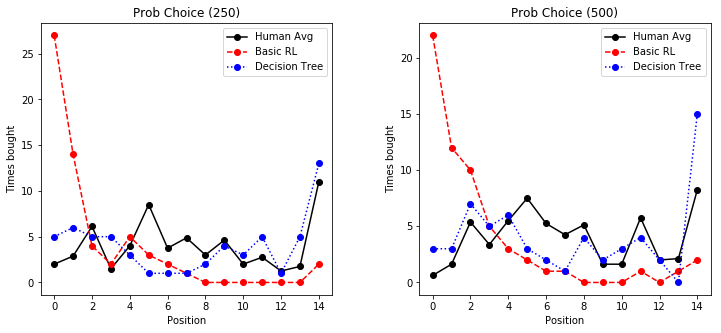

hello


In [33]:
super_duper_selecting_plotter()

In [24]:
def plot(plot_data, filename):
    fig = plt.figure()
    fig.set_figheight(8)
    fig.set_figwidth(5)
    st = fig.suptitle(filename[14:-4], fontsize="x-large")
    j = 0;
    for num in plot_data:
        y_pos = np.arange(len(num))
        j += 1
        plt.subplot(2, 2, j)
        plt.subplots_adjust(wspace=0.30, hspace=0.20)
        if j==1 or j==3:
            plt.plot(y_pos, num, 'ro:')
            plt.title("Prob Choice (250)" if j==1 else "Prob Choice (500)")
            plt.ylim([0, 1 if j == 1 or j == 3 else np.ceil(np.max(num)) + 5])     
            plt.xticks(np.arange(5), ('3', '6', '9', '12', '15'))
        else:
            bp = plt.boxplot(num, showfliers=False, patch_artist=True)
            plt.title("Avg Error (250)" if j==2 else "Avg Error (500)")
            plt.xticks(np.arange(6), ('0', '3', '6', '9', '12', '15'))
            
            for box in bp['boxes']:
                # change outline color
                box.set( color='#7570b3', linewidth=2)
                # change fill color
                box.set(facecolor = '#1b9e77')

            ## change color and linewidth of the whiskers
            for whisker in bp['whiskers']:
                whisker.set(color='#7570b3', linewidth=2)

            ## change color and linewidth of the caps
            for cap in bp['caps']:
                cap.set(color='#7570b3', linewidth=2)

            ## change color and linewidth of the medians
            for median in bp['medians']:
                median.set(color='#b2df8a', linewidth=2)

            ## change the style of fliers and their fill
            for flier in bp['fliers']:
                flier.set(marker='o', color='#e7298a', alpha=0.5)
        #plt.xlim([-1,15])
        plt.xlabel('Position')
        plt.grid(which='minor')
        plt.ylabel('Probability' if j == 1 or j == 3 else 'Error')
    
    fig.tight_layout()

    # shift subplots down:
    st.set_y(0.96)
    fig.subplots_adjust(top=0.90)
    # Save the figure
    fig.savefig(filename , bbox_inches='tight')

In [25]:
def readfile(filename):
    results = []
    fileObject = open(filename,'rb')  
    results = pickle.load(fileObject)
    fileObject.close()
    return results


def get_all_filenames(directoryname):
    txtfiles = []
    for file in glob.glob(directoryname):
        txtfiles.append(file)
    return txtfiles

In [26]:
def plot_data_comb(filenames,sloc,title):
    fileObject = open("Tests/Human_minimum.pickle",'rb')  
    minima = pickle.load(fileObject)
    fileObject.close()

    figure = ".png"
    data_correct =[]

    for i in range (len(minima)):
        temp_data_correct = np.zeros(15)
        for j in range (len(minima[i])):
            temp_data_correct[minima[i][j][1]] += 1

        data_correct.append(temp_data_correct)

    selected_sum_250 = np.zeros(5)
    selected_sum_500 = np.zeros(5)
    selected_error_250 = [np.zeros(8) for i in range(5)]
    selected_error_500 = [np.zeros(8) for i in range(5)]

    indices = [2, 5, 8, 11, 14]
    plot_data = []

    for file_name in filenames:
        fileObject = open(file_name,'rb')  
        all_selected = pickle.load(fileObject)
        fileObject.close()

        add = []
        error_sum = []
        for i in range (len(all_selected)):
            temp_correct = np.zeros(15)
            temp_error_sum = 0
            temp_error = [[] for i in range(15)]

            for j in range (len(all_selected[i])):
                if all_selected[i][j] == minima[i][j]:
                    temp_correct[minima[i][j][1]] += 1

                temp_error[minima[i][j][1]].append(np.abs(all_selected[i][j][0] - minima[i][j][0]))
                temp_error_sum += np.abs(all_selected[i][j][0] - minima[i][j][0])

            add.append(np.sum(temp_correct))
            error_sum.append(temp_error_sum)
            #temp_error = np.true_divide(temp_error, data_correct)
            temp_correct = np.true_divide(temp_correct, data_correct)        
#             plot_data.append(np.take(temp_correct, indices))
#             plot_data.append(np.take(temp_error, indices))
            
            if i == 0: selected_sum_250 = np.add(selected_sum_250, np.take(temp_correct, indices))
            else: selected_sum_500 = np.add(selected_sum_500, np.take(temp_correct, indices))
                
            if i == 0: selected_error_250 = [np.add(selected_error_250[i], np.take(temp_error, indices)[i]) for i in range(5)]
            else: selected_error_500 = [np.add(selected_error_250[i], np.take(temp_error, indices)[i]) for i in range(5)]

        print(file_name[6:], '\t\t', add, error_sum)
#         plot(plot_data, "Results/Human/"+file_name[6:]+figure)
    
    selected_sum_250 = selected_sum_250/len(filenames)
    selected_sum_500 = selected_sum_500/len(filenames)
    selected_error_250 = [selected_error_250[i]/len(filenames) for i in range(5)]
    selected_error_500 = [selected_error_500[i]/len(filenames) for i in range(5)]
    
    plot_data.extend([selected_sum_250, selected_error_250, selected_sum_500, selected_error_500])
    plot(plot_data, "Results/"+sloc+"/"+title+figure)
    return selected_sum_250, selected_sum_500, selected_error_250, selected_error_500

In [27]:
def beautifully_subplot_data(data):
    for j, dataitem in enumerate(data):
        y_pos = np.arange(len(dataitem[0]))
        fig = plt.figure()
        fig.set_figheight(4)
        fig.set_figwidth(4)
        ax1 = fig.add_subplot(111)
        ax1.plot(y_pos, dataitem[0], 'bo-', label='Human Avg')
        ax1.plot(y_pos, dataitem[1], 'ro--', label='Basic RL')
        ax1.plot(y_pos, dataitem[2], 'ko:', label='Decision Tree')
        plt.legend(loc='upper right')
        plt.ylim([0,1])
        plt.title("Comparing Results (250)" if j==0 else "Comparing Results (500)")
        plt.xticks(np.arange(5), ('3', '6', '9', '12', '15'))
        plt.show()
        fig.savefig("Results/Compare 250.png" if j==1 else "Results/Compare 500.png" , bbox_inches='tight')

In [28]:
def beautifully_plot_data():
    filenames_human = ["Tests/test_2", "Tests/test_4", "Tests/test_5", "Tests/test_6", "Tests/test_7", 
                 "Tests/test_8", "Tests/test_9", "Tests/test_10"]
    filenames_RL = ["Tests/basic_RL"]
    filenames_DT = ["Tests/decision_tree"]

    H_P_250, H_P_500, H_E_250, H_E_500 = plot_data_comb(filenames_human,"Human","Human Average")
    R_P_250, R_P_500, R_E_250, R_E_500 = plot_data_comb(filenames_RL,"Algos", "Basic RL")
    D_P_250, D_P_500, D_E_250, D_E_500 = plot_data_comb(filenames_DT,"Algos", "Decision Tree")
    
    data = []
    data.extend([[H_P_250, R_P_250, D_P_250],[H_P_500, R_P_500, D_P_500]])
    beautifully_subplot_data(data)

test_2 		 [18.0, 29.0] [979.0, 1134.0]
test_4 		 [18.0, 32.0] [947.0, 1034.0]
test_5 		 [15.0, 24.0] [1043.0, 1026.0]
test_6 		 [15.0, 17.0] [1351.0, 1907.0]
test_7 		 [15.0, 29.0] [1109.0, 1383.0]
test_8 		 [25.0, 28.0] [910.0, 1494.0]
test_9 		 [25.0, 26.0] [1026.0, 1352.0]
test_10 		 [15.0, 29.0] [1277.0, 1154.0]
basic_RL 		 [8.0, 17.0] [1492.0, 2397.0]
decision_tree 		 [13.0, 24.0] [1404.0, 1642.0]


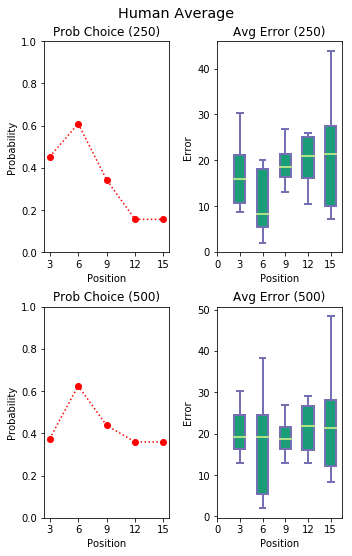

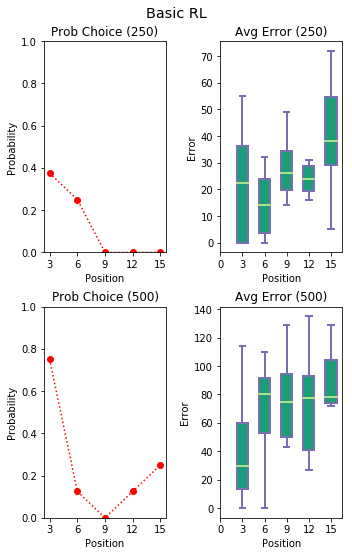

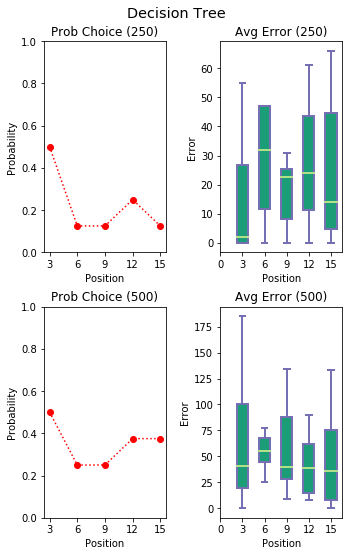

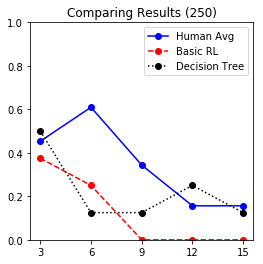

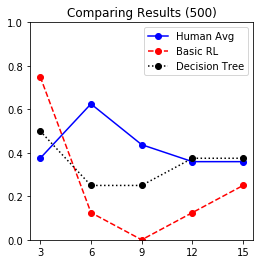

In [29]:
beautifully_plot_data()